# Bagging (1)
## 1. 패키지 참조

In [6]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sb
from pandas import read_excel
from matplotlib import pyplot as plt
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

## 2. 분류 문제
### 1) 데이터 가져오기

In [3]:
origin = read_excel('https://data.hossam.kr/G02/breast_cancer.xlsx')
origin.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


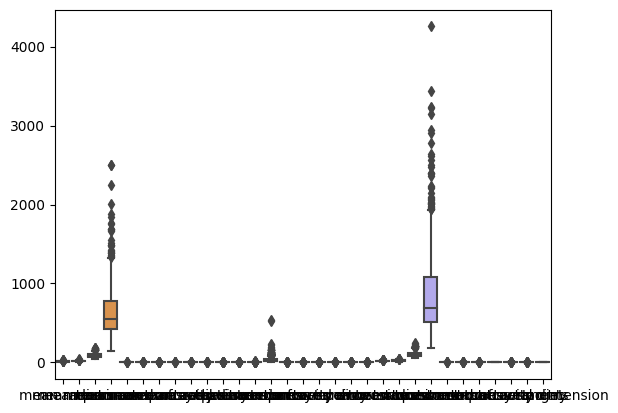

In [11]:
sb.boxplot(origin)
plt.show()
plt.close()

### 2) 데이터 전처리
#### 1_ 독립/종속 변수 분리

In [4]:
x = origin.drop('target', axis=1)
y = origin['target']
x.shape, y.shape

((569, 30), (569,))

#### 2_ 데이터 표준화

In [14]:
scaler = StandardScaler()
std_x = scaler.fit_transform(x)
std_x[:1]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
         2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
         1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
         1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461]])

#### 3_ 훈련/검증 데이터 분할

In [16]:
x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size = 0.3, random_state=777)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

### 3)  분류 모델 구현
#### 1_분류 알고리즘 객체 정의

In [17]:
lr = LogisticRegression()   # KNN, DTREE 등 모든 분류 알고리즘 적용 가능

#### 2_ Bagging 모델 구현

In [20]:
clf = BaggingClassifier(
    base_estimator = lr,
    n_estimators = 50,      # 부트스트랩 샘플 개수
    max_samples = 1,        # 부트스트랩 샘플 비율 => 1이면 학습데이터를 모두 샘플링한다
    bootstrap = True,       # 복원 추출, False이면 비복원 추출
    random_state=777,

    # 하나의 예측기에 들어가는 샘플에 대하여 컬럼의 중복 사용 여부를 결정
    bootstrap_features = False,
    n_jobs=-1
)

clf.fit(x_train, y_train)
print('BaggingClassifier 훈련 정확도: {.3f}'.format(clf.score(x_train, y_train)))
y_pred = clf.predict(x_test)
print('BaggingClassifier 검증 정확도: {.3f}'.format(accuracy_score(y_test, y_predi)))

AttributeError: 'numpy.float64' object has no attribute '3f'